## CART

#### Regreesion Tree
#### Classification Tree
#### sklearn
#### Evaluation Metrics


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Get data

manhat=pd.read_csv('manhattan.csv')
manhat=manhat[['size_sqft','min_to_subway','has_gym','rent']]
manhat_np=np.array(manhat)
X=manhat_np[:,:-1]
Y=manhat_np[:,-1].reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=41)
manhat.head()

,size_sqft,min_to_subway,has_gym,rent
0,480,9,1,2550
1,2000,4,0,11500
2,916,2,0,4500
3,975,3,1,4795
4,4800,3,1,17500


In [2]:
#Reference from https://github.com/Suji04/ML_from_Scratch/blob/master/decision%20tree%20classification.ipynb
#Regression tree 
#Node class
class Node:
    def __init__(self,feature_index=None,threshold=None,left=None,right=None,value=None):
        self.feature_index=feature_index
        self.threshold=threshold
        self.left=left
        self.right=right
        #for leaf node #mean value of the target
        self.value=value
        
#Tree class
class RegTree:
    def __init__(self,min_samples_split=10,max_depth=10):
        #Initialize the root
        self.root=None
        
        #stopping conditions
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
    
    def build_tree(self,dataset,curr_depth=0):
        X,Y=dataset[:,:-1],dataset[:,-1]
        num_samples,num_features=np.shape(X)
        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
            best_split=self.get_best_split(dataset,num_features)
            if best_split:
                #Recursive function    
                left_subtree=self.build_tree(best_split['data_left'],curr_depth+1)
                right_subtree=self.build_tree(best_split['data_right'],curr_depth+1)
                return Node(best_split['feature_index'],best_split['threshold'], left_subtree, right_subtree)

        leaf_value=Y.mean()
        return Node(value=leaf_value)
    
    def get_best_split(self,dataset,num_features):
        rss_min=float('inf')
        best_split={}
        for i in range(num_features):
            possible_thresholds=np.unique(dataset[:,i])
            for threshold in possible_thresholds:
                #Split into two regions
                R1=dataset[dataset[:,i]<threshold,:]
                R2=dataset[dataset[:,i]>=threshold,:]

                if len(R1)>0 and len(R2)>0:
                    target=R1[:,-1]
                    mean=np.full(target.shape,np.mean(target))
                    rss_R1=np.square(target-mean).sum()
                    target=R2[:,-1]
                    mean=np.full(target.shape,np.mean(target))
                    rss_R2=np.square(target-mean).sum()
                    rss_total=rss_R1+rss_R2

                    if rss_total<rss_min:
                        rss_min=rss_total
                        best_split['feature_index']=i
                        best_split['threshold']=threshold
                        best_split['data_left']=R1
                        best_split['data_right']=R2
        return best_split   
    
    def fit(self,X,Y):
        dataset=np.concatenate((X,Y),axis=1)
        self.root=self.build_tree(dataset)
    
    def predict(self,X):
        predictions=[self.make_predictions(x,self.root) for x in X]
        return predictions
    
    def make_predictions(self,x,tree):
        #predict single data point
        #recursive prediction
        if tree.value!=None:
            return tree.value
        feature_val=x[tree.feature_index]
        if feature_val<tree.threshold:
            return self.make_predictions(x,tree.left)
        else:
            return self.make_predictions(x,tree.right)
    
    def print_tree(self,tree=None,indent="  "):
        if not tree:
            tree=self.root
        
        if tree.value is not None:
            print(tree.value)
        
        else:
            print("X"+str(tree.feature_index+1),"<", tree.threshold)
            print("%sleft:" % (indent),end="")
            self.print_tree(tree.left,indent+indent)
            print("%sright:" % (indent),end="")
            self.print_tree(tree.right,indent+indent)

3214468.7810082138


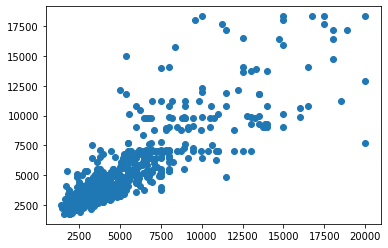

In [3]:
reg=RegTree()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
print(mean_squared_error(Y_pred,Y_test))
plt.scatter(Y_test,Y_pred)

0.9505524372622004
0.6111130743664925
4274244.3628851


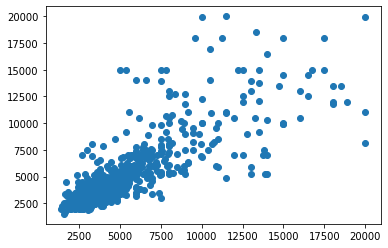

In [4]:
#DT regressor with sklearn
DTregressor=DecisionTreeRegressor(random_state=10)
#min_samples_split=2,max_depth=None,criterion gini or entropy  splitter best or random
DTregressor.fit(X_train,Y_train)
print(DTregressor.score(X_train,Y_train))
Y_pred=DTregressor.predict(X_test)
print(DTregressor.score(X_test,Y_test))
print(mean_squared_error(Y_pred,Y_test))
plt.scatter(Y_test,Y_pred)

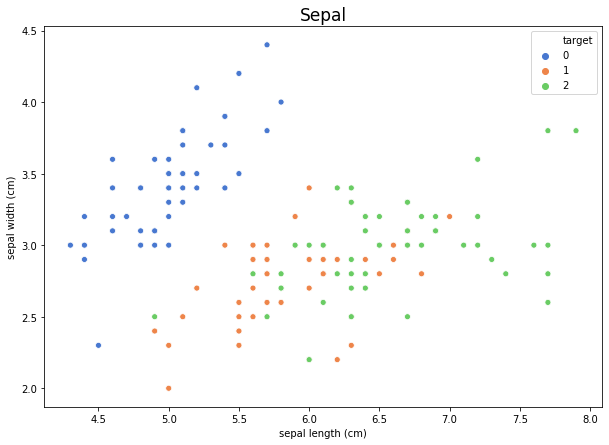

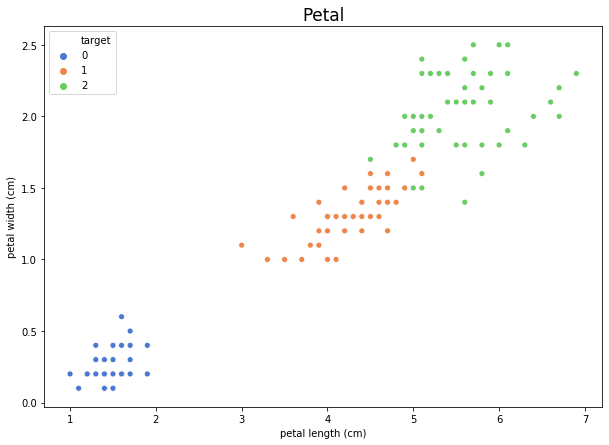

In [5]:
#Classification Tree
from sklearn.tree import DecisionTreeClassifier
#score --> accuracy 
from sklearn.metrics import accuracy_score
#Get data
from sklearn.datasets import load_iris
iris=load_iris()
features=iris['data']
feature_names=iris['feature_names']
labels=iris['target']
df=pd.DataFrame(features,columns=feature_names)
df['target']=labels
df.head()

plt.figure(figsize=(10,7))
sns.scatterplot(df.iloc[:,0],df.iloc[:,1],hue=df['target'],palette='muted')
plt.title('Sepal', fontsize=17)
plt.show()
plt.figure(figsize=(10, 7))
sns.scatterplot(df.iloc[:, 2], df.iloc[:, 3], hue=df['target'], palette='muted')
plt.title('Petal', fontsize=17)
plt.show()

In [6]:
#train test split
df.head()
df_np=np.array(df)
X=df_np[:,:-1]
Y=df_np[:,-1].reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [7]:
#Classification tree 
#Node class
class Node:
    def __init__(self,feature_index=None,threshold=None,left=None,right=None,value=None):
        self.feature_index=feature_index
        self.threshold=threshold
        self.left=left
        self.right=right
        
        #for leaf node #mean value of the target
        self.value=value
        
#Tree class
class ClassTree:
    def __init__(self,min_samples_split=10,max_depth=10):
        #Initialize the root
        self.root=None
        
        #stopping conditions
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
    
    def build_tree(self,dataset,curr_depth=0):
        X,Y=dataset[:,:-1],dataset[:,-1]
        num_samples,num_features=np.shape(X)
        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
            best_split=self.get_best_split(dataset,num_features)
            if best_split:
                #Recursive function    
                left_subtree=self.build_tree(best_split['data_left'],curr_depth+1)
                right_subtree=self.build_tree(best_split['data_right'],curr_depth+1)
                return Node(best_split['feature_index'],best_split['threshold'], left_subtree, right_subtree)

        leaf_value=np.bincount(np.int64(Y)).argmax() # Get the class with the highest frequency
        return Node(value=leaf_value)
    
    def get_best_split(self,dataset,num_features,mode='entropy'):
        measure_min=float('inf')  #measure can be either entropy or gini
        best_split={}
        for i in range(num_features):
            possible_thresholds=np.unique(dataset[:,i])
            for threshold in possible_thresholds:
                #Split into two regions
                R1=dataset[dataset[:,i]<threshold,:]
                R2=dataset[dataset[:,i]>=threshold,:]

                if len(R1)>0 and len(R2)>0:
                    target=R1[:,-1]
                    measure_R1=self.measure(target,mode=mode)
                    target=R2[:,-1]
                    measure_R2=self.measure(target,mode=mode)
                    measure_total=len(R1)/(len(R1)+len(R2))*measure_R1+len(R2)/(len(R1)+len(R2))*measure_R2
                    
                    if measure_total<measure_min:
                        measure_min=measure_total
                        best_split['feature_index']=i
                        best_split['threshold']=threshold
                        best_split['data_left']=R1
                        best_split['data_right']=R2
        return best_split   
    
    def measure(self,y,mode='entropy'):
        class_labels=np.unique(y)
        if mode=='entropy':
            entropy=0
            for cls in class_labels:
                p_cls=len(y[y==cls])/len(y)
                entropy-=(p_cls*np.log2(p_cls))
            return entropy
        elif mode=='gini':
            gini=0
            for cls in class_lables:
                p_cls=len(y[y==cls])/len(y)  #numpy syntax
                gini+=p_cls**2

            return 1-gini

    def fit(self,X,Y):
        dataset=np.concatenate((X,Y),axis=1)
        self.root=self.build_tree(dataset)
    
    def predict(self,X):
        predictions=[self.make_predictions(x,self.root) for x in X]
        return predictions
    
    def make_predictions(self,x,tree):
        #predict single data point
        #recursive prediction
        if tree.value!=None:
            return tree.value
        feature_val=x[tree.feature_index]
        if feature_val<tree.threshold:
            return self.make_predictions(x,tree.left)
        else:
            return self.make_predictions(x,tree.right)
    
    def print_tree(self,tree=None,indent="  "):
        if not tree:
            tree=self.root
        
        if tree.value is not None:
            print(tree.value)
        
        else:
            print("X"+str(tree.feature_index+1),"<", tree.threshold)
            print("%sleft:" % (indent),end="")
            self.print_tree(tree.left,indent+indent)
            print("%sright:" % (indent),end="")
            self.print_tree(tree.right,indent+indent)

In [8]:
classifier=ClassTree(min_samples_split=8)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.9666666666666667

In [9]:
#sklearn
classifier_sk=DecisionTreeClassifier(min_samples_split=10,max_depth=3)
classifier_sk.fit(X_train,Y_train)
Y_pred_sk=classifier_sk.predict(X_test)
accuracy_score(Y_pred_sk,Y_test)

0.9666666666666667

##### Evaluation Metrics

In [25]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,roc_auc_score, roc_curve, classification_report
print(confusion_matrix(Y_test,Y_pred_sk))
print(precision_recall_fscore_support(Y_test,Y_pred_sk,beta=1))
print(precision_recall_fscore_support(Y_test,Y_pred_sk,beta=1,average='macro'))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]
(array([1.        , 0.92307692, 1.        ]), array([1. , 1. , 0.9]), array([1.        , 0.96      , 0.94736842]), array([ 8, 12, 10], dtype=int64))
(0.9743589743589745, 0.9666666666666667, 0.9691228070175439, None)


In [26]:
#All in one 
print(classification_report(Y_test,Y_pred_sk,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [27]:
np.unique(Y_pred_sk,return_counts=True)

(array([0., 1., 2.]), array([ 8, 13,  9], dtype=int64))

In [35]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
features=bc['data']
feature_names=bc['feature_names']
labels=bc['target']
df=pd.DataFrame(features,columns=feature_names)
df['target']=labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [63]:
X,Y=df.iloc[:,:-1],df.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=40)
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(precision_recall_fscore_support(Y_test,Y_pred,beta=1))
print(precision_recall_fscore_support(Y_test,Y_pred,beta=1,average='macro'))

[[33  6]
 [ 5 70]]
(array([0.86842105, 0.92105263]), array([0.84615385, 0.93333333]), array([0.85714286, 0.92715232]), array([39, 75], dtype=int64))
(0.8947368421052632, 0.8897435897435897, 0.8921475875118259, None)


In [64]:
Y_pred_proba=clf.predict_proba(X_test)[:,1]
#if the final leaf has 5 zeros and 10 ones -> probability is 2/3
Y_pred_proba

array([0.97735849, 0.04938272, 0.97735849, 0.97735849, 0.04938272,
       0.97735849, 0.97735849, 0.97735849, 0.04938272, 0.97735849,
       0.04938272, 0.97735849, 0.97735849, 0.97735849, 0.04938272,
       0.97735849, 0.97735849, 0.97735849, 0.97735849, 0.97735849,
       0.97735849, 0.04938272, 0.97735849, 0.72222222, 0.04938272,
       0.04938272, 0.04938272, 0.04938272, 0.97735849, 0.97735849,
       0.97735849, 0.04938272, 0.72222222, 0.97735849, 0.97735849,
       0.04938272, 0.97735849, 0.04938272, 0.97735849, 0.97735849,
       0.04938272, 0.97735849, 0.97735849, 0.97735849, 0.04938272,
       0.04938272, 0.97735849, 0.97735849, 0.04938272, 0.97735849,
       0.04938272, 0.97735849, 0.97735849, 0.97735849, 0.72222222,
       0.97735849, 0.04938272, 0.97735849, 0.04938272, 0.97735849,
       0.97735849, 0.04938272, 0.97735849, 0.97735849, 0.97735849,
       0.04938272, 0.04938272, 0.04938272, 0.97735849, 0.97735849,
       0.97735849, 0.04938272, 0.72222222, 0.97735849, 0.04938

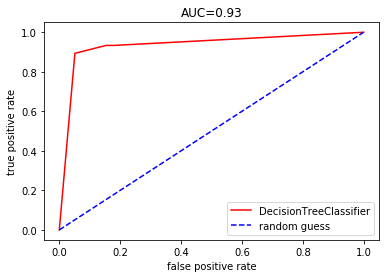

In [65]:
fpr,tpr, threshold=roc_curve(Y_test,Y_pred_proba)
auc=roc_auc_score(Y_test,Y_pred_proba)
plt.plot(fpr,tpr,"r-", label='DecisionTreeClassifier')
plt.plot([0,1],[0,1],'b--',label='random guess')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC={0:.2f}'.format(auc))
plt.legend(loc='lower right')

In [66]:
fpr

array([0.        , 0.05128205, 0.15384615, 0.17948718, 1.        ])

In [67]:
tpr

array([0.        , 0.89333333, 0.93333333, 0.93333333, 1.        ])